# Imports

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets

D:\Programmes\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Programmes\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Programmes\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Programmes\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('D:\\documents\\PRO\\Etudes\\MSc_U-Bordeaux\\StageInriaFlowers\\TestbedProject'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import gym
import teachDRL.gym_flowers_v2

# from teachDRL.gym_flowers_v2.envs.PCGAgents.CPPN.TanHSoftplusMixCPPN import TanHSoftplusMixCPPNanHSoftplusMixCPPN

# Utils

In [3]:
H_DIM = 200
W_DIM = 200

In [4]:
random_state = np.random.RandomState(43)

In [5]:
def plot_results(results):
    sns.lineplot(data=results)
    plt.ylim(-H_DIM, H_DIM)
    plt.show()

In [6]:
def plot_env(img):
    fig, ax = plt.subplots(figsize=(18, 12))
    ax.imshow(img)
    plt.axis('off')
    plt.show()

In [7]:
def perform_experiment(env, input_generator, nb_of_samples = 5, **sampler_args):
    for i in range(nb_of_samples):
        sampled_input = input_generator(**sampler_args)
        print("Sample nb {0}".format(i))
        print("Sampled input :")
        print(sampled_input)
        
        env.set_environment(input_vector=sampled_input)
        env.reset()

        plot_env(env.render(mode='rgb_array'))
        
        plot_results(env.terrain_CPPN.generate(sampled_input))

# Experiments

In [8]:
env = gym.make('parametric-continuous-parkour-v0', 
               CPPN_weights_path="weights/ground_cppn/", 
               walker_type='human')

INFO:tensorflow:Restoring parameters from weights/ground_cppn/


D:\Programmes\Anaconda3\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


### Initial function

Sample nb 0
Sampled input :
[0. 0. 0.]


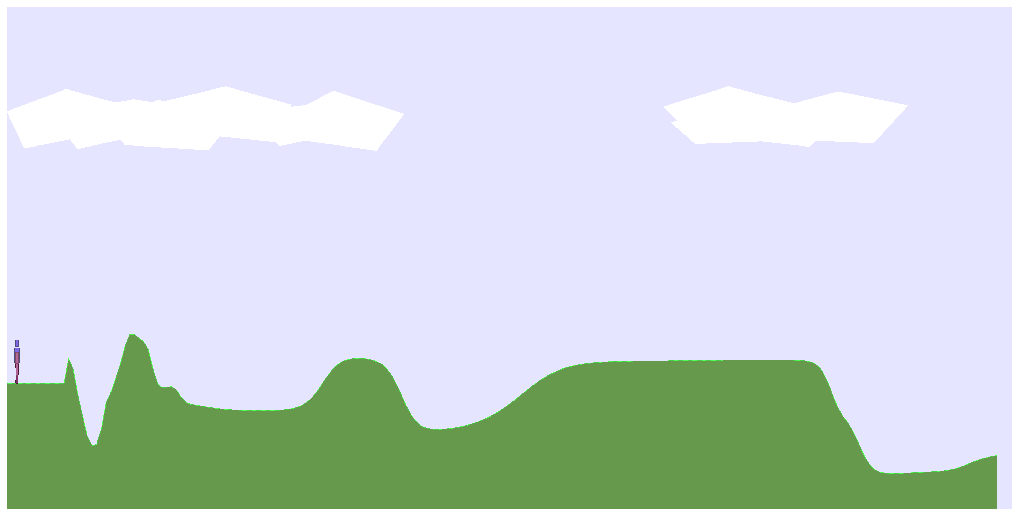

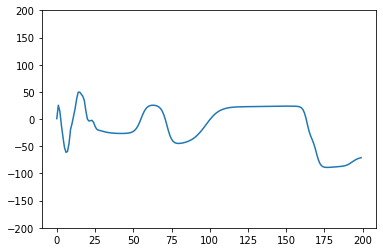

In [9]:
perform_experiment(env, lambda: np.zeros(3), nb_of_samples = 1)

### Input space explo

In [10]:
widget_dim1 = widgets.FloatSlider(min=0.0, max=1.0, step=0.01)
widget_dim2 = widgets.FloatSlider(min=0.0, max=1.0, step=0.01)
widget_dim3 = widgets.FloatSlider(min=0.0, max=1.0, step=0.01)


def printer(dim1, dim2, dim3):
    perform_experiment(env, lambda: [dim1, dim2, dim3], nb_of_samples = 1)
widgets.interact(printer, dim1=widget_dim1, dim2=widget_dim2, dim3=widget_dim3);

interactive(children=(FloatSlider(value=0.0, description='dim1', max=1.0, step=0.01), FloatSlider(value=0.0, d…

### Sampling

In [10]:
def input_sampler(size = 3, mean = 0, std = 1.0):
    return random_state.normal(mean, std, size=(size)).astype(np.float32)

Sample nb 0
Sampled input :
[ 0.25739992 -0.9084814  -0.3785031 ]


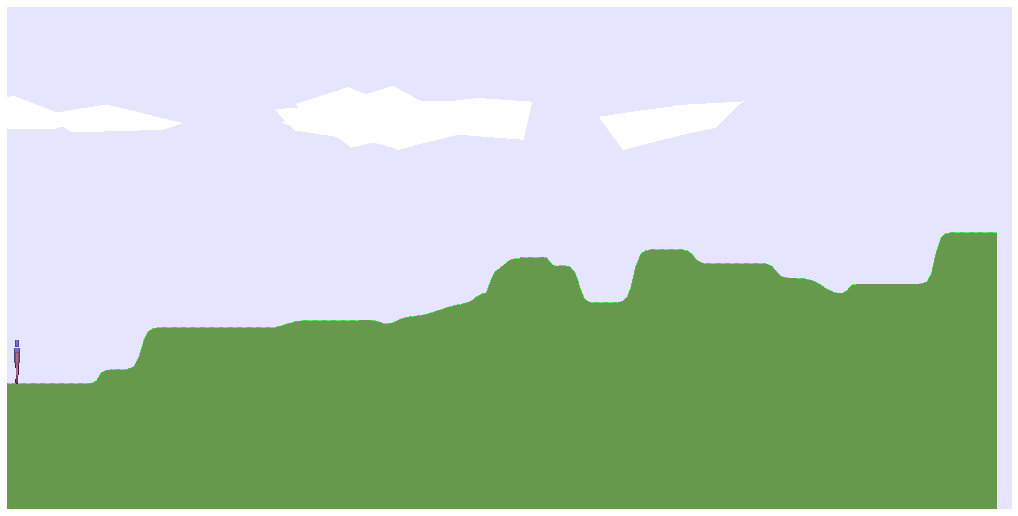

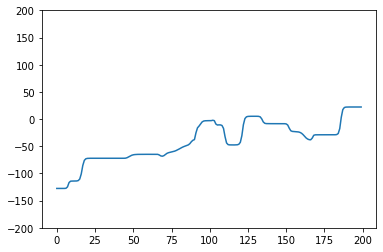

Sample nb 1
Sampled input :
[-0.5349156   0.85807335 -0.41300997]


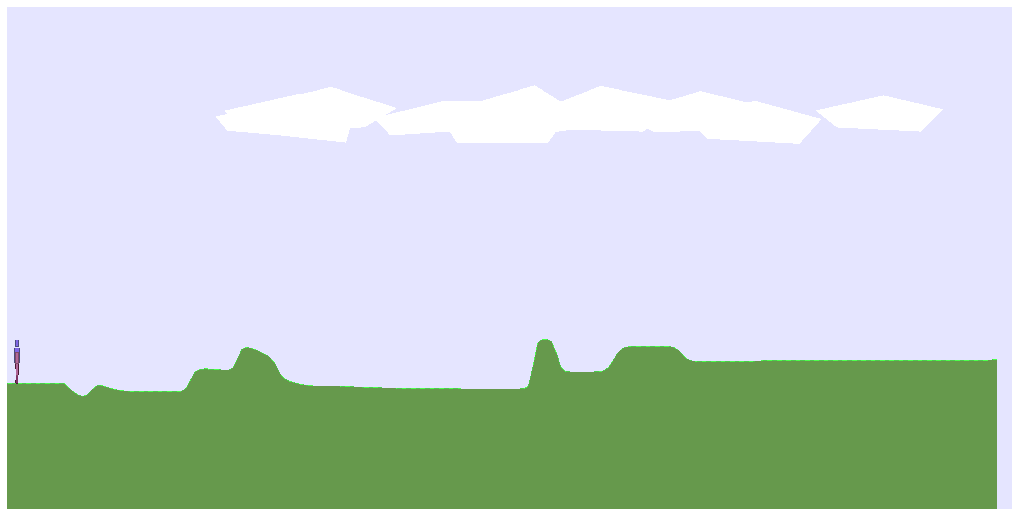

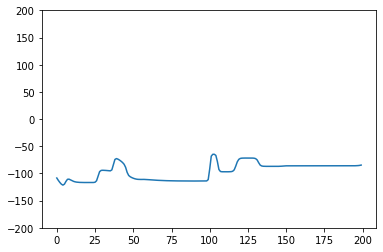

Sample nb 2
Sampled input :
[0.49818859 2.0101993  1.2628615 ]


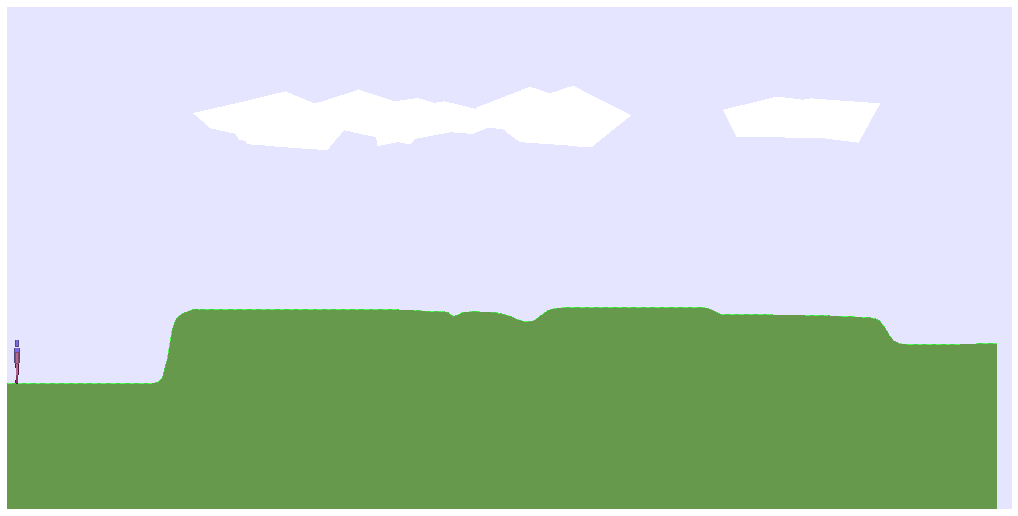

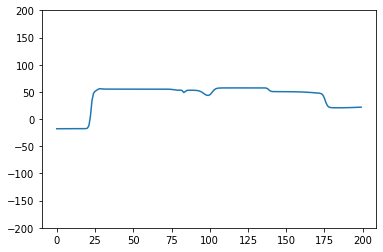

Sample nb 3
Sampled input :
[-0.43921486 -0.3464379   0.45531967]


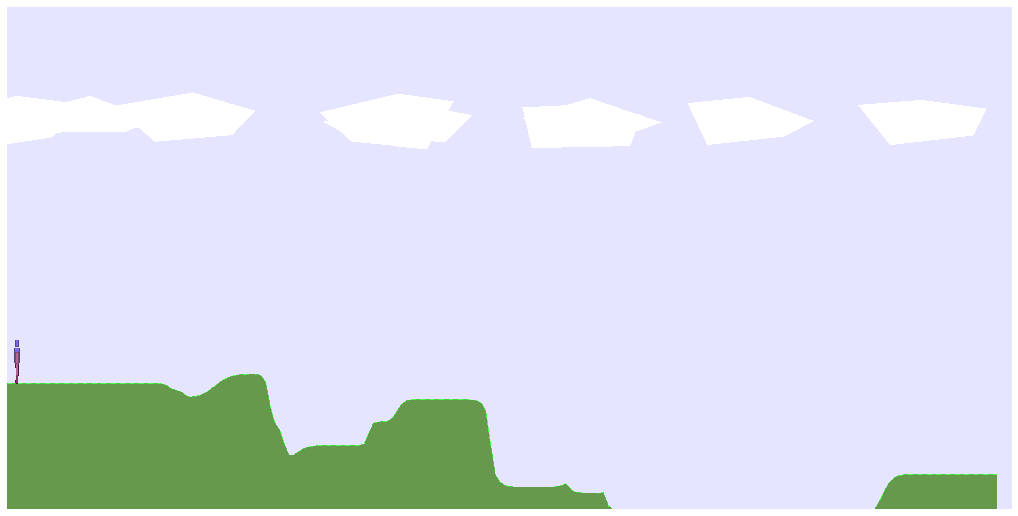

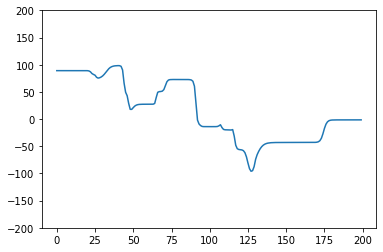

Sample nb 4
Sampled input :
[-1.6686627  -0.8620855   0.49291086]


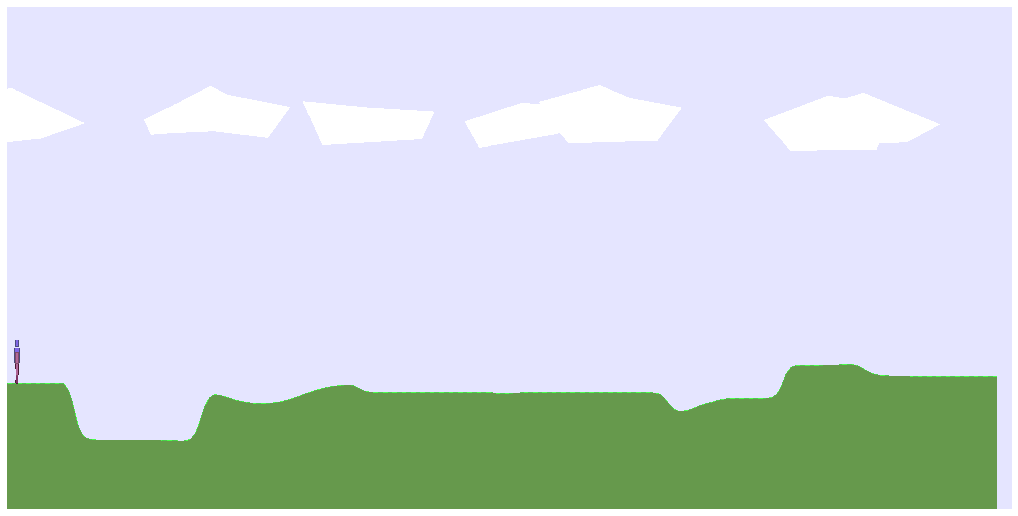

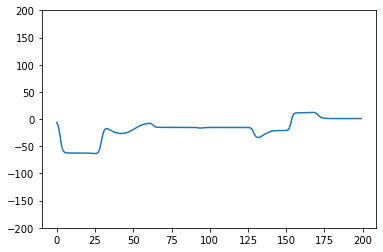

Sample nb 5
Sampled input :
[-0.1243134   1.9351363  -0.61844265]


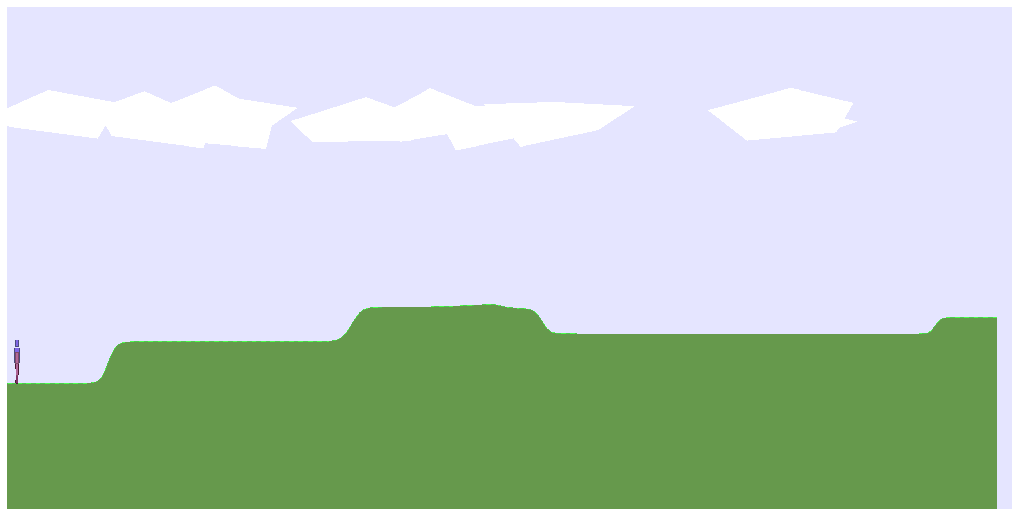

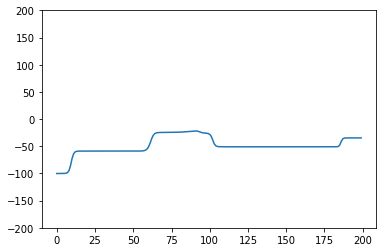

Sample nb 6
Sampled input :
[-1.046839   -0.88961756  0.01404054]


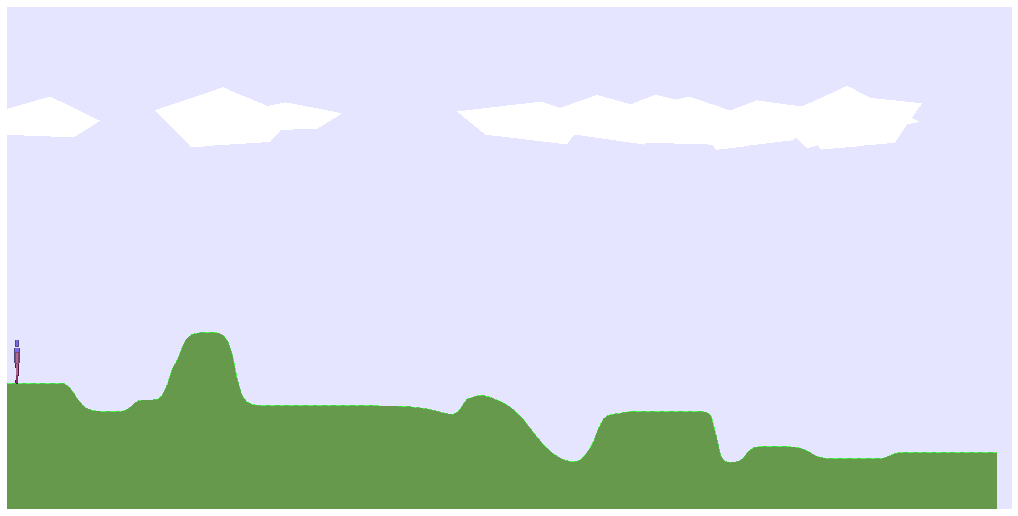

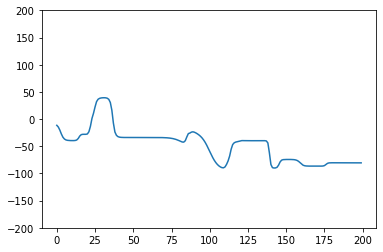

Sample nb 7
Sampled input :
[-0.1608297  2.2303596 -0.3991157]


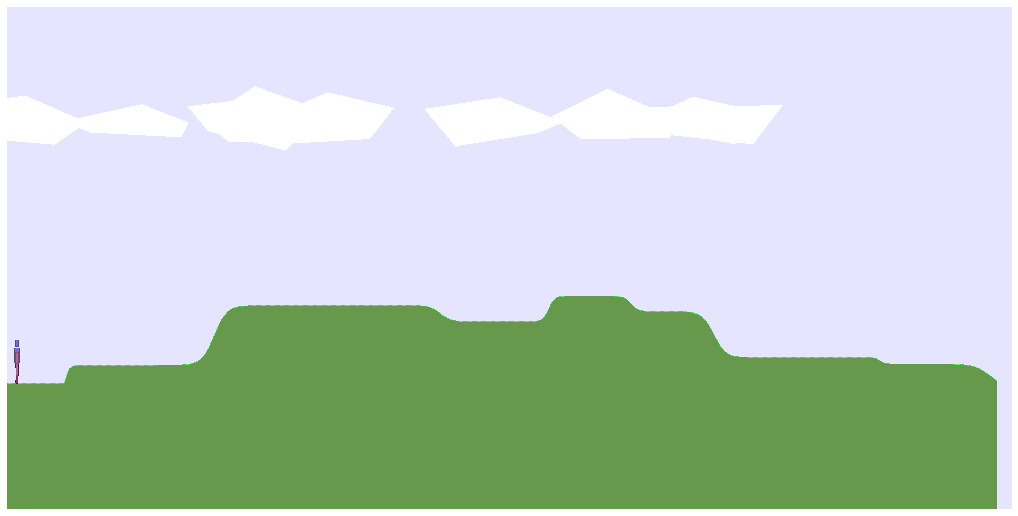

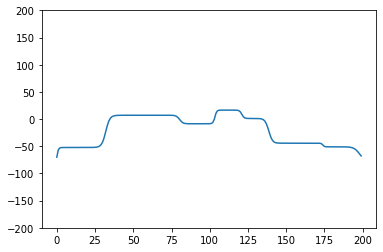

Sample nb 8
Sampled input :
[ 0.05444456  0.8841818  -0.10798056]


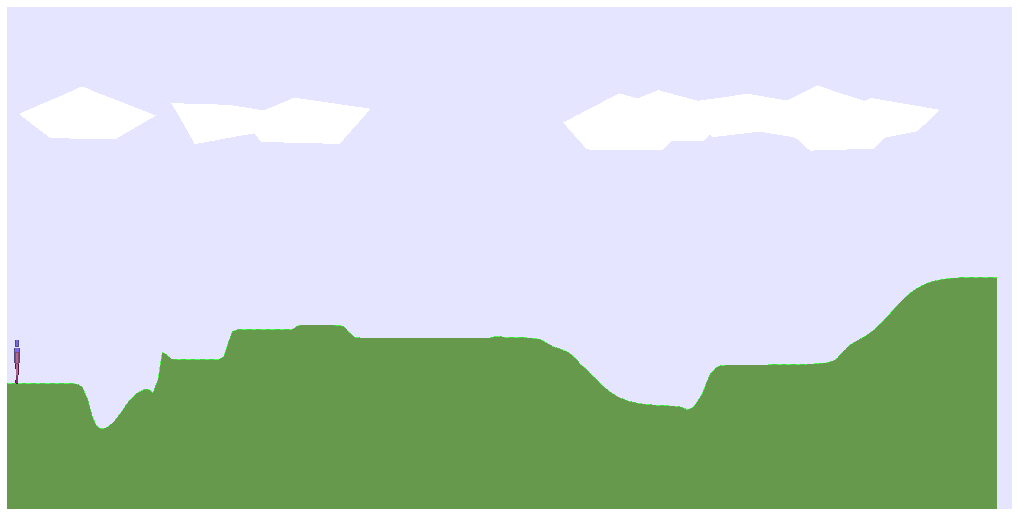

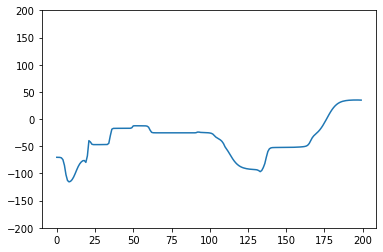

Sample nb 9
Sampled input :
[0.55560696 0.39490664 0.83720505]


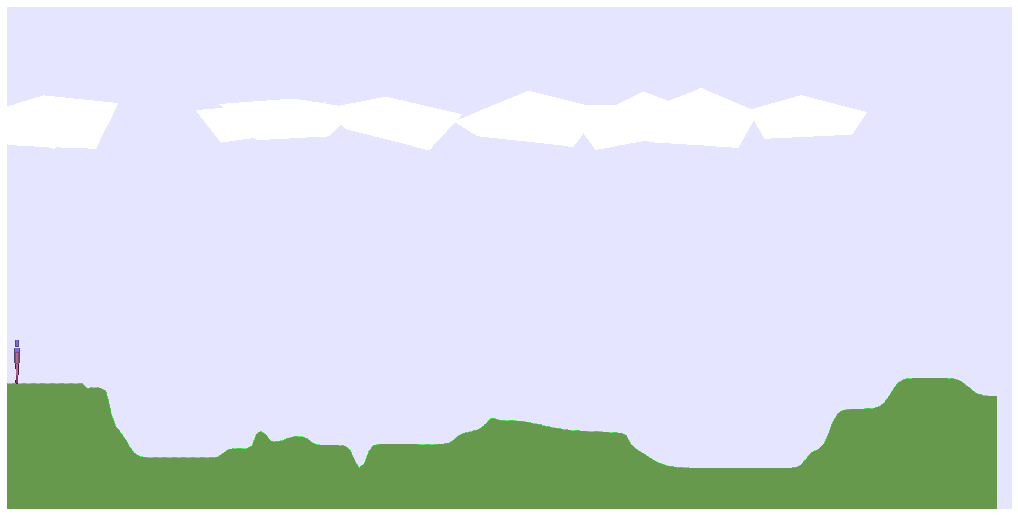

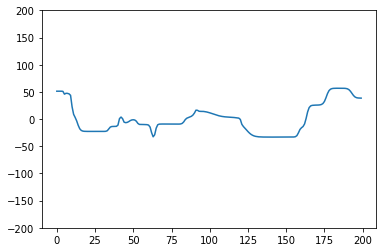

In [11]:
perform_experiment(env, input_sampler, nb_of_samples = 10)